In [1]:
import scipy.stats as stats
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageGrab

In [2]:
# Q1 A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet 
#between two units. A randomly selected sample of cutlets was collected from both units and measured? 
#Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that 
#you carried out to check validity of the assumptions.

In [3]:
df= pd.read_csv("E:\\download folder\\Cutlets.csv")
df.shape

(35, 2)

In [4]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

<Axes: ylabel='Unit A'>

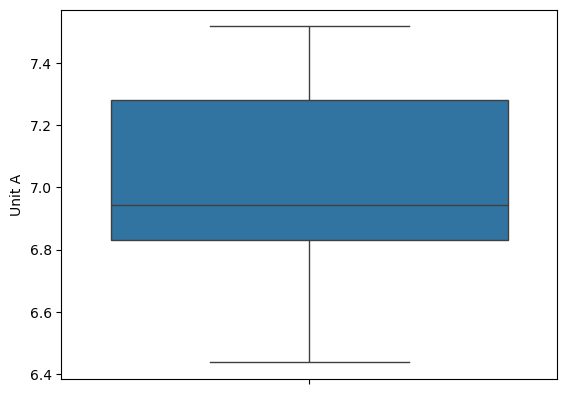

In [7]:
sns.boxplot(df["Unit A"])

<Axes: ylabel='Unit B'>

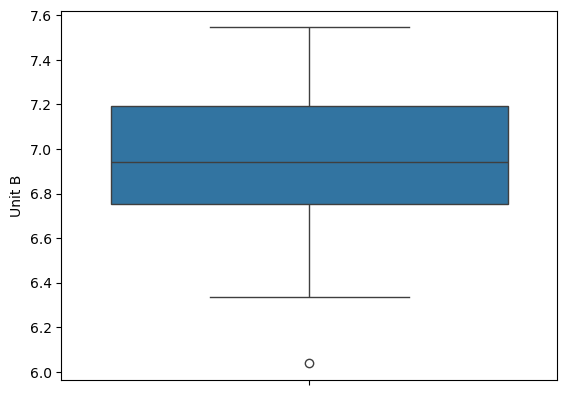

In [8]:
sns.boxplot(df["Unit B"])

<Axes: xlabel='Unit A', ylabel='Count'>

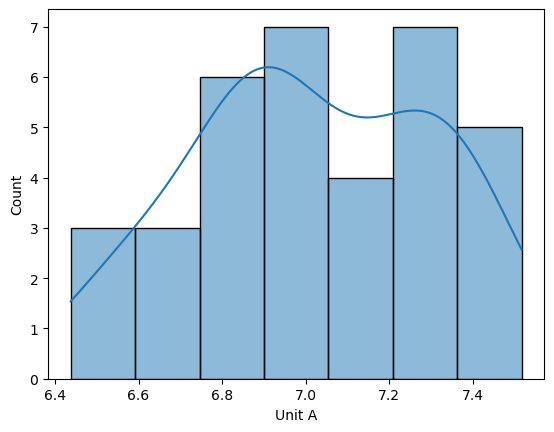

In [9]:
sns.histplot(df["Unit A"], kde=True)

<Axes: xlabel='Unit B', ylabel='Count'>

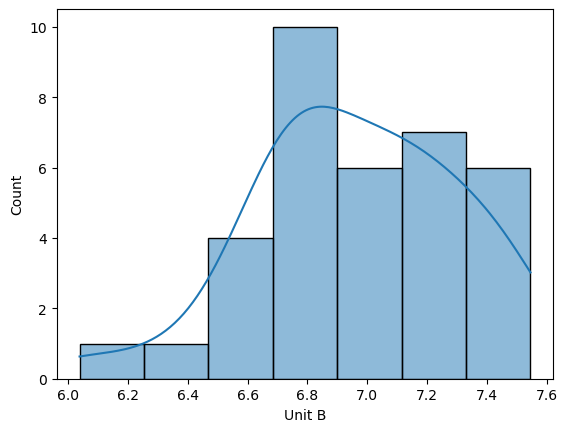

In [10]:
sns.histplot(df["Unit B"], kde=True)

In [11]:
# We need to perform a 2 tailed t-test.
# And we need to verify if there is any difference in the mean of both samples.
# Null hypothesis: mean1 = mean2
# Alternate hypothesis: mean1 != mean2
# Alpha = 0.025 for 2 tailed test

In [12]:
statistics, p_value= stats.ttest_ind(df["Unit A"], df["Unit B"])

print("P value: ", p_value)

P value:  0.4722394724599501


In [13]:
alpha = 0.025

if p_value<alpha:
    print("Ho is rejected and H1 is accepted")
else:
    print("H1 is rejected and Ho is accepted")

H1 is rejected and Ho is accepted


In [14]:
# Therefore, we can conclude that there is no significance difference between unit A and unit B

In [15]:
# Q2 A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) 
#of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT 
#for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
#Analyze the data and determine whether there is any difference in average TAT among the different 
#laboratories at 5% significance level.

In [16]:
df= pd.read_csv("E:\\download folder\\LabTAT.csv")
df.shape

(120, 4)

In [17]:
df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [18]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [19]:
df.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

Text(0.5, 1.0, 'Laboratory 4')

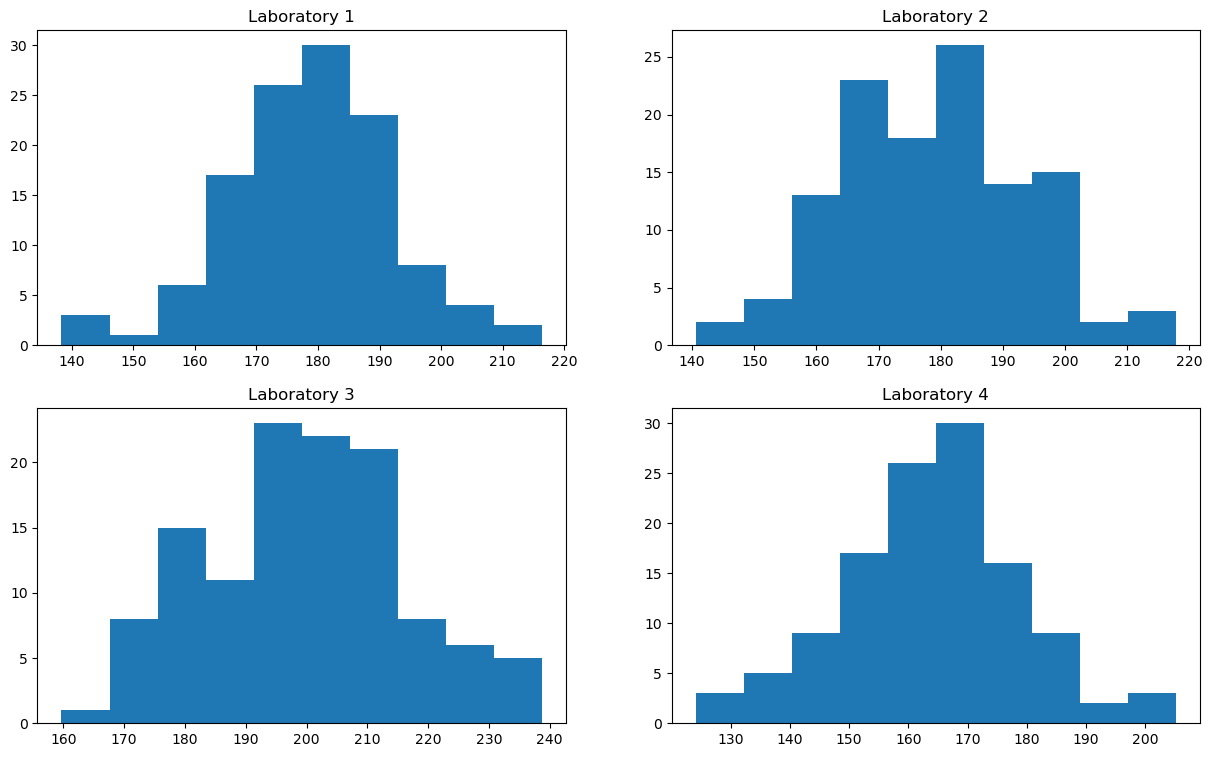

In [20]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.hist(df["Laboratory 1"])
plt.title("Laboratory 1")
plt.subplot(2,2,2)
plt.hist(df["Laboratory 2"])
plt.title("Laboratory 2")
plt.subplot(2,2,3)
plt.hist(df["Laboratory 3"])
plt.title("Laboratory 3")
plt.subplot(2,2,4)
plt.hist(df["Laboratory 4"])
plt.title("Laboratory 4")

Text(0.5, 1.0, 'Laboratory 4')

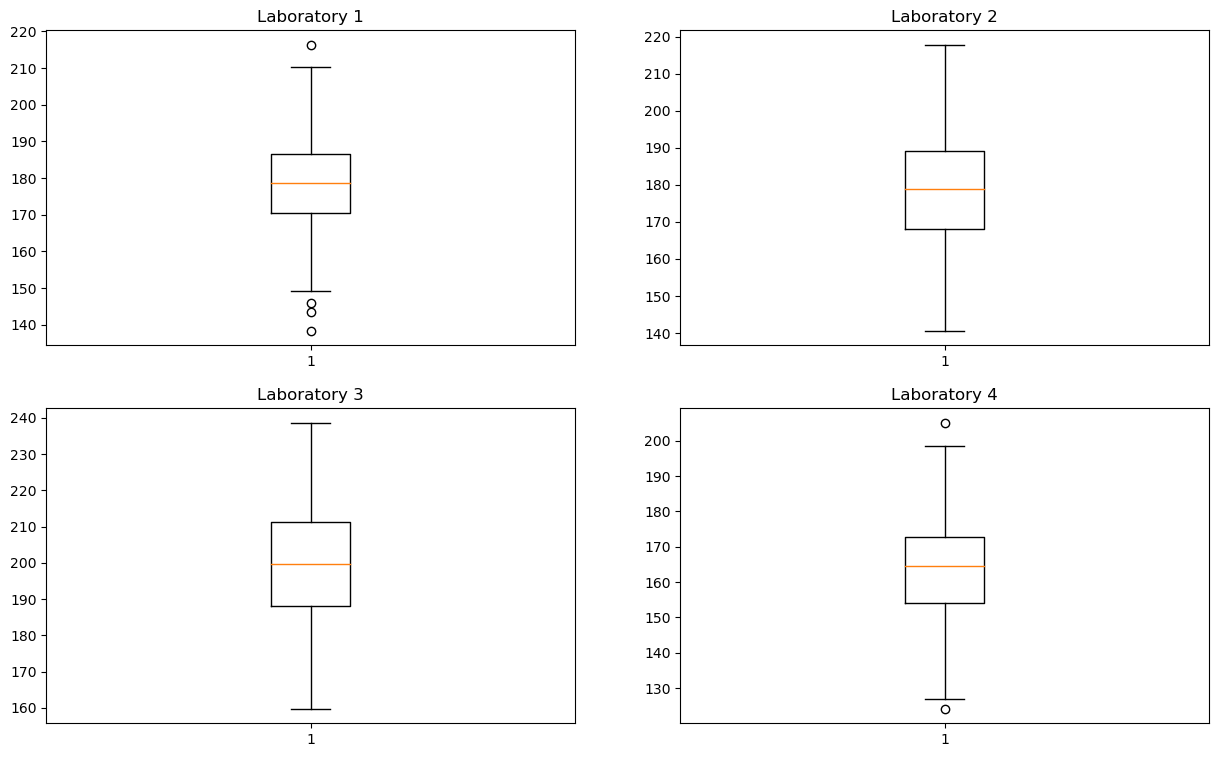

In [21]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.boxplot(df["Laboratory 1"])
plt.title("Laboratory 1")
plt.subplot(2,2,2)
plt.boxplot(df["Laboratory 2"])
plt.title("Laboratory 2")
plt.subplot(2,2,3)
plt.boxplot(df["Laboratory 3"])
plt.title("Laboratory 3")
plt.subplot(2,2,4)
plt.boxplot(df["Laboratory 4"])
plt.title("Laboratory 4")

In [22]:
# We need to perform ANOVA test as there are more than 2 samples.
# Null hpothesis: Mean1=Mean2=Mean3=Mean4
# Alternate hypothesis: Atleast one mean is different
# Alpha = 0.05

In [23]:
statistics, p_value= stats.f_oneway(df["Laboratory 1"],df["Laboratory 2"],df["Laboratory 3"],df["Laboratory 4"])

print("P value: ", p_value)

P value:  2.1156708949992414e-57


In [24]:
alpha= 0.05

if p_value<alpha:
    print("Ho is rejected and H1 is accepted")
else:
    print("H1 is rejected and Ho is accepted")

Ho is rejected and H1 is accepted


In [25]:
#There we accept alternate hypothesis as there is significant difference between the samples.

In [26]:
ImageGrab.grabclipboard()

#Q3

In [27]:
# We need to perform Chi-sqaure test of independence
# # Null hpothesis: Variables are independent (No relationship)
# Alternate hypothesis: Variables are dependent (They have relationship)
# Alpha = 0.05

In [28]:
df= pd.read_csv("E:\\download folder\\BuyerRatio.csv")
df.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [29]:
df= df.transpose()
df

,0,1
Observed Values,Males,Females
East,50,435
West,142,1523
North,131,1356
South,70,750


In [31]:
observed_frequency = [[50,142,131,70],
        [435,1523,1356,750]]

In [32]:
stat, p,dof,exp= stats.chi2_contingency(observed_frequency)

print("Statistics: ", stat)
print("P_value: ", p)
print("Degree of freedom: ", dof)
print("Expected frequency: ", exp)

Statistics:  1.595945538661058
P_value:  0.6603094907091882
Degree of freedom:  3
Expected frequency:  [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [33]:
stats.chi2_contingency(observed_frequency) 

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [34]:
observed= np.array([50,142,131,70, 435,1523,1356,750])
expected= np.array([  42.76531299,  146.81287862,  131.11756787,72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 
                    747.69575948])

In [35]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [36]:
alpha= 0.05

if p_value<alpha:
    print("Ho is rejected and H1 is accepted")
else:
    print("H1 is rejected and Ho is accepted")

H1 is rejected and Ho is accepted


In [37]:
#Therefore, we can conclude that the variables are independent and are similar across regions.

In [38]:
# Q4 TeleCall uses 4 centers around the globe to process customer order forms. 
#They audit a certain %  of the customer order forms. Any error in order form renders it defective 
#and has to be reworked before processing.  
#The manager wants to check whether the defective %  varies by centre. 
#Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [39]:
df= pd.read_csv("E:\\download folder\\Costomer+OrderForm.csv")
df.shape

(300, 4)

In [40]:
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [41]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [42]:
df.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [43]:
print(df['Phillippines'].value_counts(),'\n',df['Indonesia'].value_counts(),'\n',df['Malta'].value_counts(),'\n',df['India'].value_counts())


Phillippines
Error Free    271
Defective      29
Name: count, dtype: int64 
 Indonesia
Error Free    267
Defective      33
Name: count, dtype: int64 
 Malta
Error Free    269
Defective      31
Name: count, dtype: int64 
 India
Error Free    280
Defective      20
Name: count, dtype: int64


In [44]:
# We need to perform Chi-sqaure test of independence
# # Null hpothesis: Variables are independent (No relationship)
# Alternate hypothesis: Variables are dependent (They have relationship)
# Alpha = 0.05

In [45]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [46]:
stat, p_value, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics: ", stat)
print("P Value: ", p_value)
print("Degree of freedom: ", dof)
print("Expeceted frequency: ", exp)

Statistics:  3.858960685820355
P Value:  0.2771020991233135
Degree of freedom:  3
Expeceted frequency:  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [47]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [50]:
stat, p_value = stats.chisquare(observed, expected, ddof = df)
print("Statistics: ", stat)
print("P Value: ", p_value)

Statistics:  3.858960685820355
P Value:  0.4254298144535761


In [51]:
alpha= 0.05

if p_value<alpha:
    print("Ho is rejected and H1 is accepted")
else:
    print("H1 is rejected and Ho is accepted")

H1 is rejected and Ho is accepted


In [ ]:
#Therefor, the centers are independent.